In [1]:
from lib.xarm.wrapper import XArmAPI
from lib.KeyenceProfilo.KeyenceProfilo import Keyence
import matplotlib.pyplot as plt
import lib.utils as U
import numpy as np
from PIL import Image
import time
import ipywidgets as widgets

## 1 - Initialize xArm robot

In [2]:
arm = XArmAPI('192.168.1.197')
arm.connect()
arm.motion_enable(enable=True)
arm.set_mode(0)
arm.set_state(state=0)
print(f'xArm version: {arm.get_version()[1]}')
arm.set_gripper_enable(enable=True)
arm.set_gripper_mode(0)
print(f'gripper ready to use')

is_old_protocol: False
version_number: 1.6.0
[motion_enable], xArm is not ready to move
[set_state], xArm is ready to move
xArm version: h2,v1.6.0
gripper ready to use


In [3]:
arm.set_collision_sensitivity(2) # 0 -> destroy all, 5 -> very sensitive

0

In [4]:
print(f'new sensivity level [0-5]: {arm.collision_sensitivity}')

new sensivity level [0-5]: 2


In [12]:
spd = 20            # in mm/s, 20 is quite slow
spd_servo = 30      # in °/s,  15 is quite slow

In [5]:
# arm.move_gohome()   # <-- use this to go home whenever needed

0

In [32]:
# arm.set_gripper_position(70, speed=None, wait=True)     # 0 closed

[SDK][ERROR][2021-01-14 11:51:23][base.py:171] - - wait_move, xarm is stop, state=5


0

In [16]:
# colision test
# arm.set_position(x=100, y=0, z=0, roll=0, pitch=0, yaw=0, speed=spd, is_radian=False, wait=True, relative=True)

ControllerError, code: 31
[SDK][ERROR][2021-01-14 11:39:28][base.py:171] - - wait_move, xarm has error, error=31


1

In [34]:
U.xArmUI(arm)

In [ ]:
# Load position
load_crt = [-74.0, 410.753998, -240.558929, -179.999791, -5.7e-05, 3.826155]
load_srv = [95.647111, 58.308196, -58.30854, -25.921585, 0.000172, -242.257499, 0.0]

In [3]:
K = Keyence(ip_address='192.168.0.1')

Keyence DLL version:  1 2 0 0
Keyence connected


In [19]:
B_border_vis_crt = []
B_border_vis_srv = []

BL_border_vis_crt = [-106.999931, 410.753998, -223.559006, -179.999791, -5.7e-05, 3.826155]
BL_border_vis_srv = [104.600092, 55.026007, -56.228359, -0.004584, 1.20218, -259.221462, 0.0]
HL_border_vis_crt = [-107.0, 410.753998, -48.559067, -179.999791, -5.7e-05, 3.826155]
HL_border_vis_srv = [104.600894, 21.360096, -42.344045, -0.000286, 20.983777, -259.225014, 0.0]

BR_border_vis_crt = [-74.000069, 410.753998, -223.559006, -179.999791, -5.7e-05, 3.826155]
BR_border_vis_srv = [100.206193, 54.693978, -54.822836, -0.035924, 0.128629, -263.584077, 0.0]
HR_border_vis_crt = [-74.0, 410.753998, -48.558929, -179.999791, -5.7e-05, 3.826155]
HR_border_vis_srv = [100.212667, 20.507019, -40.821868, -0.000229, 20.314677, -263.613241, 0.0]

In [32]:
## RIGHT
vitesse = 50
spd = 20            # in mm/s, 20 is quite slow
spd_servo = 30      # in °/s,  15 is quite slow

# sample = 'M6D-1_Right_repro'
sample = '20LAE101_Center_repro'

for i in range(5):

    # arm.set_position(*haute_cart, speed=spd/2, relative=False, is_radian=False, wait=True)
    arm.set_servo_angle(angle=BR_border_vis_srv, speed=spd_servo, relative=False, wait=True)  # en bas à droite

    K.HS_start_acquisition()
    arm.set_position(*HR_border_vis_crt, speed=vitesse, relative=False, is_radian=False, wait=True)
    K.HS_stop_acquisition()

    HS_array_profiles_Z, HS_array_profiles_Gray = K.get_buffer_profiles((f'C:\data\profiloto\z_{sample}{i}.csv', f'C:\data\profiloto\gray_{sample}{i}.csv'))

    arm.set_position(*BR_border_vis_crt, speed=120, relative=False, is_radian=False, wait=True) 


In [27]:
## LEFT
vitesse = 50
spd = 20            # in mm/s, 20 is quite slow
spd_servo = 30      # in °/s,  15 is quite slow

sample = 'M6D-1_Left_repro'

for i in range(5):

    # arm.set_position(*haute_cart, speed=spd/2, relative=False, is_radian=False, wait=True)
    arm.set_servo_angle(angle=BL_border_vis_srv, speed=spd_servo, relative=False, wait=True)  # en bas à droite

    K.HS_start_acquisition()
    arm.set_position(*HL_border_vis_crt, speed=vitesse, relative=False, is_radian=False, wait=True)
    K.HS_stop_acquisition()

    HS_array_profiles_Z, HS_array_profiles_Gray = K.get_buffer_profiles((f'C:\data\profiloto\z_{sample}{i}.csv', f'C:\data\profiloto\gray_{sample}{i}.csv'))

    arm.set_position(*BL_border_vis_crt, speed=120, relative=False, is_radian=False, wait=True) 


In [ ]:

img = HS_array_profiles_Gray
print(f'Raw image size: {img.shape[0]}, {img.shape[1]}')
print(f'Raw image grey level min, max: {img.min()}, {img.max()}')
# Image normalization to 8 bits
img_normalized = np.array(255*img / img.max(), dtype='uint8')
# Image.fromarray(img_normalized).save(r'.\image\img_grey.jpg')
plt.imshow(img_normalized, cmap='gray')

In [24]:
arm.set_servo_angle(angle=BR_border_vis_srv, speed=spd_servo/2, relative=False, wait=True)

0

In [57]:
#xdist,  ydist, zdist, rolldeg, pitchdeg, yawdeg = arm.get_position()[1]
xdist,  ydist, zdist, rolldeg, pitchdeg, yawdeg = pos_basse
arm.set_position(x=xdist, y=ydist, z=zdist, roll=rolldeg, pitch=pitchdeg, yaw=yawdeg, speed=15, is_radian=False, wait=True, relative=False)

0

In [72]:
# clean errors
print(f'error was: {arm.error_code}')
arm.clean_error()
arm.set_mode(0)
arm.set_state(state=0)

error was: 24
[set_state], xArm is ready to move


0

## Simple move (with Roman)

In [4]:
K = Keyence(ip_address='192.168.0.1')

Keyence DLL version:  1 2 0 0
Keyence connected


In [ ]:
vitesse = 20

In [5]:
# go up at speed test speed
pos_basse = [-146.264008, 300.938995, -224.538925, 179.999963, -0.0, 40.000017]
pos_basse_angle = [115.920936, 59.147465, -69.701404, -180.00002, -10.553997, -104.079044, 0.0]
pos_haute = [-146.264008, 300.938995, -74.53907, 179.999963, -0.0, 40.000017]
pos_haute_angle = [115.920936, 33.183252, -57.184167, -180.00002, -24.000916, -104.079044, 0.0]


In [6]:
#xdist,  ydist, zdist, rolldeg, pitchdeg, yawdeg = arm.get_position()[1]
#xdist,  ydist, zdist, rolldeg, pitchdeg, yawdeg = pos_haute_angle
#arm.set_position(x=xdist, y=ydist, z=zdist, roll=rolldeg, pitch=pitchdeg, yaw=yawdeg, speed=15, is_radian=False, wait=True, relative=False)
arm.set_servo_angle(servo_id=None, angle=pos_haute_angle, relative=False, wait=True)


0

In [7]:
# move to down position
xdist,  ydist, zdist, rolldeg, pitchdeg, yawdeg = pos_basse
arm.set_position(x=xdist, y=ydist, z=zdist, roll=rolldeg, pitch=pitchdeg, yaw=yawdeg, speed=vitesse, is_radian=False, wait=True, relative=False)

NameError: name 'vitesse' is not defined

In [84]:
# move to up position
xdist,  ydist, zdist, rolldeg, pitchdeg, yawdeg = pos_haute
arm.set_position(x=xdist, y=ydist, z=zdist, roll=rolldeg, pitch=pitchdeg, yaw=yawdeg, speed=vitesse, is_radian=False, wait=True, relative=False)

0

## Workflow -move plaque and acq

Raw image size: 4923, 3200
Raw image grey level min, max: 0.0, 949.0


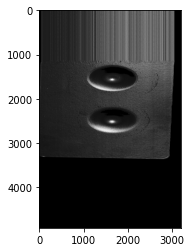

In [108]:
# # Move at initial pos
arm.set_servo_angle(servo_id=None, angle=pos_basse_angle, relative=False, wait=True)

# move to down position
xdist,  ydist, zdist, rolldeg, pitchdeg, yawdeg = pos_basse
arm.set_position(x=xdist, y=ydist, z=zdist, roll=rolldeg, pitch=pitchdeg, yaw=yawdeg, speed=vitesse, is_radian=False, wait=True, relative=False)

# Start profilometer acquisition here
K.HS_start_acquisition()

time.sleep(1)

vitesse = 50
xdist,  ydist, zdist, rolldeg, pitchdeg, yawdeg = pos_haute
arm.set_position(x=xdist, y=ydist, z=zdist, roll=rolldeg, pitch=pitchdeg, yaw=yawdeg, speed=vitesse, is_radian=False, wait=True, relative=False)

# Stop profilometer acquisition here
K.HS_stop_acquisition()
xdist,  ydist, zdist, rolldeg, pitchdeg, yawdeg = pos_basse
arm.set_position(x=xdist, y=ydist, z=zdist, roll=rolldeg, pitch=pitchdeg, yaw=yawdeg, speed=vitesse, is_radian=False, wait=True, relative=False)

# HS_array_profiles_Z, HS_array_profiles_Gray = K.get_buffer_profiles((f'C:\data\profiloto\K_z_profile_{vitesse}.csv', f'C:\data\profiloto\K_gray_profile_{vitesse}.csv'))
HS_array_profiles_Z, HS_array_profiles_Gray = K.get_buffer_profiles((f'C:\data\profiloto\z_sample20LAE101-4backsideDarkC7mm.csv', f'C:\data\profiloto\gray_sample20LAE101-4backsideDarkC7mm.csv'))

img = HS_array_profiles_Gray
print(f'Raw image size: {img.shape[0]}, {img.shape[1]}')
print(f'Raw image grey level min, max: {img.min()}, {img.max()}')

# Image normalization to 8 bits
img_normalized = np.array(255*img / img.max(), dtype='uint8')

# Image.fromarray(img_normalized).save(r'.\image\img_grey.jpg')
plt.imshow(img_normalized, cmap='gray')


In [65]:

#HS_array_profiles_Z, HS_array_profiles_Gray = K.get_buffer_profiles()
#HS_array_profiles_Z, HS_array_profiles_Gray = K.get_buffer_profiles((f'.\image\K_z_profile_{vitesse}.csv', f'.\image\K_gray_profile_{vitesse}.csv'))


In [19]:
arm.set_servo_angle(servo_id=None, angle=new_pos[1], relative=False, wait=True)


0

In [10]:
xdist,  ydist, zdist, rolldeg, pitchdeg, yawdeg = arm.get_position()[1]
#xdist,  ydist, zdist, rolldeg, pitchdeg, yawdeg = [1.882302, 244.589539, -201.239731, -180.00002, -0.0, 0.0]
arm.set_position(x=xdist, y=ydist, z=zdist, roll=rolldeg, pitch=pitchdeg, yaw=yawdeg, speed=spd, is_radian=False, wait=True, relative=False)

0

In [12]:
spd = 50

In [3]:
arm.reset(wait=True)    # apply a clean_error() but no last_used_angles + move_gohome()

## 2 - Initialize Keyence profilometer

In [17]:
K = Keyence(ip_address='192.168.0.1')

Keyence DLL version:  1 2 0 0
Keyence connected


## 3 - Waypoints

In [6]:
# rack based positions
wp_uprack = [98.66952, -14.596902, -53.688666, -149.48022, -48.34446, 33.258481, 0.0]
plateMposU = [73.256779, -31.426907, -25.522921, -150.005908, -50.358177, 6.668255, 0.0]
plateMposD = [76.070231, -29.477991, -22.196557, -147.013866, -42.989482, 6.700684, 0.0]
delta_get_palte = [2.813452, 1.948916, 3.326364, 2.992042, 7.368695, 0.032429, 0.0]

# in front of profilometer
profilo1 = [141.570251, -36.427912, -18.26366, -1.864806, 54.309695, -172.497424, 0.0]

## 4 - Take a scan of plate (M) and drop it back

In [79]:
# A. take plate on rack
arm.set_gripper_position(100, speed=None, wait=True)     # 0 closed
arm.set_servo_angle(servo_id=None, angle=wp_uprack, speed=spd_servo, relative=False, wait=True)
arm.set_servo_angle(servo_id=None, angle=plateMposU, speed=spd_servo, relative=False, wait=True)
arm.set_servo_angle(servo_id=None, angle=delta_get_palte, speed=spd_servo, relative=True, wait=True)
arm.set_gripper_position(-3, speed=None, wait=True)     # 0 closed
arm.set_servo_angle(servo_id=None, angle=plateMposU, speed=spd_servo, relative=False, wait=True)
arm.set_servo_angle(servo_id=None, angle=wp_uprack, speed=spd_servo, relative=False, wait=True)

# B. profilo part
arm.set_servo_angle(servo_id=None, angle=profilo1, speed=spd_servo*1.7, relative=False, wait=True)
# Start profilometer acquisition here
# K.HS_start_acquisition()
# go up
arm.set_position(x=0, y=0, z=150, roll=0, pitch=0, yaw=0, speed=spd*2, is_radian=False, wait=True, relative=True)
# Stop profilometer acquisition here
# K.HS_stop_acquisition()
# HS_array_profiles_Z, HS_array_profiles_Gray = K.get_buffer_profiles(('.\image\K_z_profile.csv', '.\image\K_gray_profile.csv'))
arm.set_servo_angle(servo_id=None, angle=wp_uprack, speed=spd_servo*2, relative=False, wait=True)

# C. drop back plate on rack
arm.set_servo_angle(servo_id=None, angle=plateMposU, speed=spd_servo, relative=False, wait=True)
arm.set_servo_angle(servo_id=None, angle=np.array(delta_get_palte)/2, speed=spd_servo, relative=True, wait=True)
arm.set_position(x=3, y=-2, z=-3, roll=0, pitch=0, yaw=0, speed=spd/2, wait=True, relative=True)
arm.set_position(x=0, y=0, z=-3, roll=0, pitch=0, yaw=0, speed=spd/2, wait=True, relative=True)
arm.set_gripper_position(80, speed=None, wait=True)     # 0 closed
arm.set_position(x=-8, y=8, z=0, roll=0, pitch=0, yaw=0, speed=spd/2, wait=True, relative=True)
arm.set_position(x=0, y=0, z=35, roll=0, pitch=0, yaw=0, speed=spd/2, wait=True, relative=True)
arm.set_servo_angle(servo_id=None, angle=wp_uprack, speed=spd_servo*2, relative=False, wait=True)

0

## 5 - plot profiles
### 5.a Z profile (bad normalization, to be fixed !)

Raw image size: 948, 3200
Raw image grey level min, max: -2147483648.0, 736550.0
reversed image grey level min, max: 0.0, 2148220198.0
normalized image grey level min, max: 0, 255


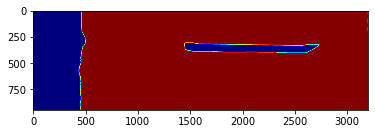

In [7]:
img = HS_array_profiles_Z.copy()
print(f'Raw image size: {img.shape[0]}, {img.shape[1]}')
print(f'Raw image grey level min, max: {img.min()}, {img.max()}')

# Image normalization to 8 bits
img_reverse = img - img.min()
print(f'reversed image grey level min, max: {img_reverse.min()}, {img_reverse.max()}')
img_norm = img_reverse / np.linalg.norm(img_reverse)
img_normalized = np.array(255*img_norm / img_norm.max(), dtype='uint8')
print(f'normalized image grey level min, max: {img_normalized.min()}, {img_normalized.max()}')

Image.fromarray(img_normalized).save(r'.\image\img_z.jpg')
plt.imshow(img_normalized, cmap='jet')

### 5.b Grey (bad normalization, to be fixed !)

Raw image size: 4962, 3200
Raw image grey level min, max: 0.0, 951.0


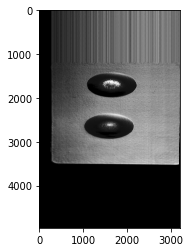

In [102]:
img = HS_array_profiles_Gray
print(f'Raw image size: {img.shape[0]}, {img.shape[1]}')
print(f'Raw image grey level min, max: {img.min()}, {img.max()}')

# Image normalization to 8 bits
img_normalized = np.array(255*img / img.max(), dtype='uint8')

# Image.fromarray(img_normalized).save(r'.\image\img_grey.jpg')
plt.imshow(img_normalized, cmap='gray')

## Manual mode

In [9]:
# Turn on manual mode
arm.set_mode(2)
arm.set_state(0)

[set_state], xArm is ready to move


0

In [34]:
# Turn off manual mode after recording
arm.set_mode(0)
arm.set_state(0)
# Note the new position (cartesian or servo angle)
new_pos = arm.get_servo_angle()
# We must set the position here to save it in the robot !!!!!
arm.set_servo_angle(servo_id=None, angle=new_pos[1], relative=False, wait=True)
print(f'cartesian pos: {arm.get_position()[1]}\nservo pos: {new_pos[1]}')

cartesian pos: [-205.279099, 164.366058, 283.227936, -178.190275, -2.38253, -44.799341]
servo pos: [141.581825, -37.250335, -16.092551, -1.851857, 55.925551, -172.584342, 0.0]


In [20]:
# clean errors
print(f'error was: {arm.error_code}')
arm.clean_error()
arm.set_mode(0)
arm.set_state(state=0)

error was: 0
[clean_error], xArm is not ready to move
[set_state], xArm is ready to move


0

## to reset

In [11]:
arm.reset(wait=True)    # apply a clean_error() but no last_used_angles + move_gohome()

# speed loop wobble tests

In [73]:
# A. take plate on rack
arm.set_gripper_position(70, speed=None, wait=True)     # 0 closed
arm.set_servo_angle(servo_id=None, angle=wp_uprack, speed=spd_servo, relative=False, wait=True)
arm.set_servo_angle(servo_id=None, angle=plateMposU, speed=spd_servo, relative=False, wait=True)
arm.set_servo_angle(servo_id=None, angle=delta_get_palte, speed=spd_servo, relative=True, wait=True)
arm.set_gripper_position(-3, speed=None, wait=True)     # 0 closed
arm.set_servo_angle(servo_id=None, angle=plateMposU, speed=spd_servo, relative=False, wait=True)
arm.set_servo_angle(servo_id=None, angle=wp_uprack, speed=spd_servo, relative=False, wait=True)

0

In [15]:
arm.set_servo_angle(servo_id=None, angle=profilo1, speed=spd_servo, relative=False, wait=True)

0

In [13]:
# use this to fix green led of the keyence by moving the plate
# arm.set_position(x=0, y=0, z=10, roll=0, pitch=0, yaw=0, speed=spd, is_radian=False, wait=True, relative=True)

In [9]:
z = []
grey = []
for spd_test in [40]:          #  [5, 10, 40, 100] in mm/s (20 is quite slow)
    # HS_array_profiles_Z = np.array([])            
    # HS_array_profiles_Gray = np.array([])

    # Start profilometer acquisition here
    K.HS_start_acquisition()
    
    # go up at speed test speed
    arm.set_position(x=0, y=0, z=140, roll=0, pitch=0, yaw=0, speed=spd_test,
    is_radian=False, wait=True, relative=True)
    # arm.set_pause_time(2)

    # Stop profilometer acquisition here
    K.HS_stop_acquisition()
    # HS_array_profiles_Z, HS_array_profiles_Gray = K.get_buffer_profiles()
    HS_array_profiles_Z, HS_array_profiles_Gray = K.get_buffer_profiles((f'.\image\K_z_profile_{spd_test}.csv', f'.\image\K_gray_profile_{spd_test}.csv'))
    
    z.append(HS_array_profiles_Z)
    grey.append(HS_array_profiles_Gray)

    # go down
    arm.set_position(x=0, y=0, z=-140, roll=0, pitch=0, yaw=0, speed=spd,
    is_radian=False, wait=True, relative=True)

Raw image size: 4490, 3200


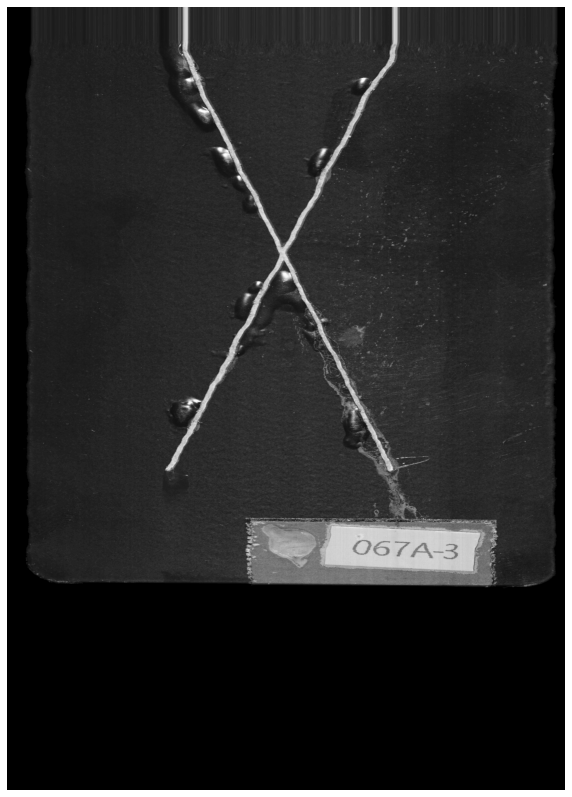

In [10]:
# Treat datas
fig, axes = plt.subplots(nrows=1, ncols=len(z), figsize=(10,15))
for i, img in enumerate(grey):
    print(f'Raw image size: {img.shape[0]}, {img.shape[1]}')
    # print(f'Raw image grey level min, max: {img.min()}, {img.max()}')
    # Image normalization to 8 bits
    img_normalized = np.array(255*img / img.max(), dtype='uint8')
    Image.fromarray(img_normalized).save(f'.\image\img_grey_{i}.jpg')
    # axes[i].imshow(img_normalized, cmap='gray')
    # axes[i].set_axis_off()
    axes.imshow(img_normalized, cmap='gray')
    axes.set_axis_off()

In [74]:
# C. drop back plate on rack
arm.set_servo_angle(servo_id=None, angle=wp_uprack, speed=spd_servo*2, relative=False, wait=True)
arm.set_servo_angle(servo_id=None, angle=plateMposU, speed=spd_servo, relative=False, wait=True)
arm.set_servo_angle(servo_id=None, angle=np.array(delta_get_palte)/2, speed=spd_servo, relative=True, wait=True)
arm.set_position(x=3, y=-2, z=-3, roll=0, pitch=0, yaw=0, speed=spd/2, is_radian=False, wait=True, relative=True)
arm.set_position(x=0, y=0, z=-3, roll=0, pitch=0, yaw=0, speed=spd/2, is_radian=False, wait=True, relative=True)

0

In [75]:
arm.set_gripper_position(80, speed=None, wait=True)     # 0 closed
arm.set_position(x=-10, y=10, z=0, roll=0, pitch=0, yaw=0, speed=spd/2, is_radian=False, wait=True, relative=True)
arm.set_position(x=0, y=0, z=35, roll=0, pitch=0, yaw=0, speed=spd/2, is_radian=False, wait=True, relative=True)
arm.set_servo_angle(servo_id=None, angle=wp_uprack, speed=spd_servo*2, relative=False, wait=True)

0

0

0

0

0

### xArm UI
#### running the cell below will give this UI:
<img src=".\assets\ipw_1.PNG">
once you are fine with the position press the yellow printpos button to print the position<br>
do it for every waypoints

roll (y), pitch (x), yaw (z)

In [7]:
# We must set the position here to save it in the robot !!!!!
new_pos = arm.get_servo_angle()
arm.set_servo_angle(servo_id=None, angle=new_pos[1], relative=False, wait=True)

# 1 - Widgets
style = {'description_width': 'initial'}
# 1.a cartesian block
dist_wid = widgets.FloatText(value=5, description='dist (mm)',  layout=widgets.Layout(width='180px'), style=style)
spd_wid = widgets.IntText(value=30, description='speed (mm/s)',  layout=widgets.Layout(width='180px'), style=style)
up_wid = widgets.Button(description='upward', disabled=False, button_style='', tooltip='go upward for distance value', icon='', style=widgets.ButtonStyle(button_color='#4e8ac7'))
forward_wid = widgets.Button(description='forward', disabled=False, button_style='', tooltip='go forward for distance value', icon='',style=widgets.ButtonStyle(button_color='lightblue'))
left_wid = widgets.Button(description='left', disabled=False, button_style='', tooltip='go left for distance value', icon='', style=widgets.ButtonStyle(button_color='lightblue'))
reset_wid = widgets.Button(description='RESET', disabled=False, button_style='', tooltip='Clear error and go home action', icon='', style=widgets.ButtonStyle(button_color='#bd8f8f'))
right_wid = widgets.Button(description='right', disabled=False, button_style='', tooltip='go right for distance value', icon='', style=widgets.ButtonStyle(button_color='lightblue'))
down_wid = widgets.Button(description='downward', disabled=False, button_style='', tooltip='go downward for distance value', icon='', style=widgets.ButtonStyle(button_color='#4e8ac7'))
backyard_wid = widgets.Button(description='backward', disabled=False, button_style='', tooltip='go backward for distance value', icon='', style=widgets.ButtonStyle(button_color='lightblue'))
roll_wid = widgets.Button(description='roll', disabled=False, button_style='', tooltip='rotation on roll axis', icon='', style=widgets.ButtonStyle(button_color='#c9d9ff'))
pitch_wid = widgets.Button(description='pitch', disabled=False, button_style='', tooltip='rotation on pitch axis', icon='', style=widgets.ButtonStyle(button_color='#c9d9ff'))
yaw_wid = widgets.Button(description='yaw', disabled=False, button_style='', tooltip='rotation on yaw axis', icon='', style=widgets.ButtonStyle(button_color='#c9d9ff'))
angle_wid = widgets.IntText(value=5, description='angle (°)',  layout=widgets.Layout(width='180px'), style=style)
# 1.b servo angles block
servo_a_wid = widgets.IntText(value=5, description='servo angle (°)',  layout=widgets.Layout(width='180px'), style=style)
spd_servo_wid = widgets.IntText(value=20, description='servo speed (°/s)',  layout=widgets.Layout(width='180px'), style=style)
serv01_wid = widgets.Button(description='servo 1', disabled=False, button_style='', tooltip='servo ID = 1', icon='', style=widgets.ButtonStyle(button_color='lightgreen'))
serv02_wid = widgets.Button(description='servo 2', disabled=False, button_style='', tooltip='servo ID = 2', icon='', style=widgets.ButtonStyle(button_color='lightgreen'))
serv03_wid = widgets.Button(description='servo 3', disabled=False, button_style='', tooltip='servo ID = 3', icon='', style=widgets.ButtonStyle(button_color='lightgreen'))
serv04_wid = widgets.Button(description='servo 4', disabled=False, button_style='', tooltip='servo ID = 4', icon='', style=widgets.ButtonStyle(button_color='lightgreen'))
serv05_wid = widgets.Button(description='servo 5', disabled=False, button_style='', tooltip='servo ID = 5', icon='', style=widgets.ButtonStyle(button_color='lightgreen'))
serv06_wid = widgets.Button(description='servo 6', disabled=False, button_style='', tooltip='servo ID = 6', icon='', style=widgets.ButtonStyle(button_color='lightgreen'))
# 1.c gripper block
grip_dist = widgets.IntText(value=5, description='gripper dist (mm)',  layout=widgets.Layout(width='200px'))
open_wid = widgets.Button(description='open', disabled=False, button_style='', tooltip='open gripper', icon='', style=widgets.ButtonStyle(button_color='#e4aaf0'))
close_wid = widgets.Button(description='close', disabled=False, button_style='', tooltip='close gripper', icon='', style=widgets.ButtonStyle(button_color='#e4aaf0'))
# 1.d manual block
manON_wid = widgets.Button(description='ON', disabled=False, button_style='', tooltip='Manual mode ON', icon='', style=widgets.ButtonStyle(button_color='#fcebae'))
manOFF_wid = widgets.Button(description='OFF', disabled=False, button_style='', tooltip='Manual mode OFF', icon='', style=widgets.ButtonStyle(button_color='#fcebae'))
# 1.e printer block
printpos_wid = widgets.Button(description='printpos', disabled=False, button_style='', tooltip='print positions', icon='', style=widgets.ButtonStyle(button_color='yellow'))

output = widgets.Output()

dist = 5
spd = 30
angle = 5
spd_servo = 20
servo_angle = 5
gripper_dist = 5

# 2 - Function when modification detected
def move(change):
    global dist, spd
    if type(change) is not str:
        xdist=0; ydist=0; zdist=0; rolldeg=0; pitchdeg=0; yawdeg=0
        if change.get_state()['description'] == 'forward':
            xdist = dist
        elif change.get_state()['description'] == 'backward':
            xdist = -dist
        elif change.get_state()['description'] == 'left':
            ydist = -dist
        elif change.get_state()['description'] == 'right':
            ydist = dist
        elif change.get_state()['description'] == 'upward':
            zdist = dist
        elif change.get_state()['description'] == 'downward':
            zdist = -dist
        elif change.get_state()['description'] == 'roll':
            rolldeg = angle
        elif change.get_state()['description'] == 'pitch':
            pitchdeg = angle
        elif change.get_state()['description'] == 'yaw':
            yawdeg = angle

        with output:
            arm.set_position(x=xdist, y=ydist, z=zdist, roll=rolldeg, pitch=pitchdeg, yaw=yawdeg, speed=spd, is_radian=False, wait=True, relative=True)
    
def change_dist(change):
    global dist
    dist = dist_wid.value

def change_spd(change):
    global spd
    spd = spd_wid.value

def change_angle(change):
    global angle
    angle = angle_wid.value

def change_reset(change):
    if type(change) is not str:
        with output:
            arm.reset(wait=True)
            # We must set the position here to save it in the robot !!!!!
            new_pos = arm.get_servo_angle()
            arm.set_servo_angle(servo_id=None, angle=new_pos[1], relative=False, wait=True)

def printpos_fun(change):
    with output:
        output.clear_output()
        print(f'cartesian pos: {arm.get_position()[1]}\nservo pos: {arm.get_servo_angle()[1]}\ngripper pos: {arm.get_gripper_position()[1]}')

def change_servo_angle(change):
    global servo_angle
    servo_angle = servo_a_wid.value

def change_spd_servo(change):
    global spd_servo
    spd_servo = spd_servo_wid.value

def servo_move(change):
    global spd_servo
    if type(change) is not str:
        angles = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]     # must be float type number
        if change.get_state()['description'] == 'servo 1':
            angles[0] = servo_angle
        elif change.get_state()['description'] == 'servo 2':
            angles[1] = servo_angle
        elif change.get_state()['description'] == 'servo 3':
            angles[2] = servo_angle
        elif change.get_state()['description'] == 'servo 4':
            angles[3] = servo_angle
        elif change.get_state()['description'] == 'servo 5':
            angles[4] = servo_angle
        elif change.get_state()['description'] == 'servo 6':
            angles[5] = servo_angle

        with output:
            arm.set_servo_angle(servo_id=None, angle=angles, speed=spd_servo, relative=True, wait=True)
            
def change_grip_dist(change):
    global gripper_dist
    gripper_dist = grip_dist.value

def gripper_move(change):
    if type(change) is not str:
        grip_pos = arm.get_gripper_position()[1]
        if change.get_state()['description'] == 'open':
            new_grip_pos = grip_pos + gripper_dist
        elif change.get_state()['description'] == 'close':
            new_grip_pos = grip_pos - gripper_dist
        
        with output:
            arm.set_gripper_position(new_grip_pos, speed=None, wait=True)     # 0 closed

def manual_mode_change(change):
    if type(change) is not str:
        if change.get_state()['description'] == 'ON':
            with output:
                # Turn on manual mode
                arm.set_mode(2)
                arm.set_state(0)
                output.clear_output()
                print(f'Manual mode ON')
        if change.get_state()['description'] == 'OFF':
            with output:
                # Turn off manual mode after recording
                arm.set_mode(0)
                arm.set_state(0)
                # Note the new position (cartesian or servo angle)
                new_pos = arm.get_servo_angle()
                # We must set the position here to save it in the robot !!!!!
                arm.set_servo_angle(servo_id=None, angle=new_pos[1], relative=False, wait=True)
                output.clear_output()
                print(f'Manual mode OFF')

# 3 - Observers
dist_wid.observe(change_dist, names="value")
spd_wid.observe(change_spd, names="value")
up_wid.on_click(move)
forward_wid.on_click(move)
left_wid.on_click(move)
reset_wid.on_click(change_reset)
right_wid.on_click(move)
down_wid.on_click(move)
backyard_wid.on_click(move)
angle_wid.observe(change_angle, names="value")
roll_wid.on_click(move)
pitch_wid.on_click(move)
yaw_wid.on_click(move)
servo_a_wid.observe(change_servo_angle, names="value")
spd_servo_wid.observe(change_spd_servo, names="value")
serv01_wid.on_click(servo_move)
serv02_wid.on_click(servo_move)
serv03_wid.on_click(servo_move)
serv04_wid.on_click(servo_move)
serv05_wid.on_click(servo_move)
serv06_wid.on_click(servo_move)
grip_dist.observe(change_grip_dist, names="value")
open_wid.on_click(gripper_move)
close_wid.on_click(gripper_move)
manON_wid.on_click(manual_mode_change)
manOFF_wid.on_click(manual_mode_change)
printpos_wid.on_click(printpos_fun)

move("doesn't matter what I send here, just triggering") # MUST be done before widgets.VBox - if response(x) is last, NOTHING is drawn! 

# 4 - Widgets layout
widgets.VBox([
    widgets.Label(value="Cartesian block ------------------------------------------------------"),
    widgets.HBox([dist_wid, spd_wid]),
    widgets.HBox([up_wid, forward_wid]),
    widgets.HBox([left_wid, reset_wid, right_wid]),
    widgets.HBox([down_wid, backyard_wid]),
    widgets.HBox([angle_wid, roll_wid, pitch_wid, yaw_wid]),
    widgets.Label(value="Servo angles block ---------------------------------------------------"),
    widgets.HBox([servo_a_wid, spd_servo_wid]),
    widgets.HBox([serv01_wid, serv02_wid, serv03_wid, serv04_wid, serv05_wid, serv06_wid]),
    widgets.Label(value="Gripper block --------------------------------------------------------"),
    widgets.HBox([grip_dist, open_wid, close_wid]),
    widgets.Label(value="Manual block ---------------------------------------------------------"),
    widgets.HBox([manON_wid, manOFF_wid]),
    widgets.Label(value="Printer button -------------------------------------------------------"),
    printpos_wid,
    output,
])